In [1]:
import matplotlib as mpl
import networkx as nx
import visJS2jupyter.visJS_module
%matplotlib inline

# Create a graph in nx

### Undirected

In [3]:
G=nx.Graph()

In [4]:
G.add_edge('A','B', weight=6)
G.add_edge('C','B', weight=13)
G.add_edge('C','F', weight=21)
G.add_edge('C','E', weight=25)
G.add_edge('C','B', weight=13)
G.add_edge('G','F', weight=9)
G.add_edge('D','E', weight=2)
G.add_edge('E','H', weight=9)
G.add_edge('I','E', weight=10)
G.add_edge('J','E', weight=15)
G.add_edge('I','J', weight=3)

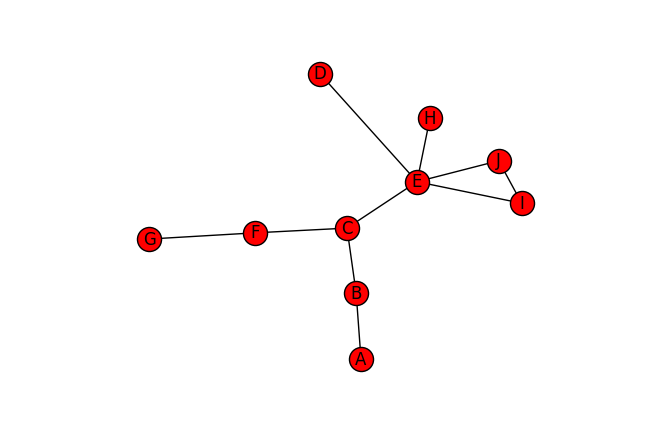

In [5]:
nx.draw(G,with_labels=True) ## undirected graph

## Directed

In [6]:
G1=nx.DiGraph()

| Species      | Species they feed on     |
|--------------|--------------------------|
| Shark        | Sea otters               |
| Sea otter    | Large crabs, Sea urchins |
| Large crabs  | Small fishes             |
| Sea urchins  | Kelp                     |
| Small fishes | Kelp                     |
| Kelp         | ----                     |

In [7]:
G1.add_edge('Kelp','Small fishes', weight=21)
G1.add_edge('Kelp','Sea urchins', weight=20)
G1.add_edge('Sea urchins','Sea otters', weight=25)
G1.add_edge('Small fishes','Large crabs', weight=26)
G1.add_edge('Large crabs','Sea otters', weight=27)
G1.add_edge('Sea otters','Sharks', weight=29)

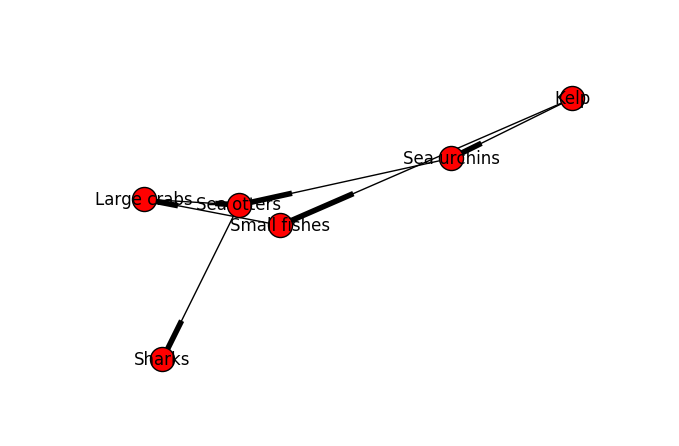

In [8]:
nx.draw(G1,with_labels=True) ## directed

## Multigraph

In [9]:
G2 = nx.MultiGraph()

In [10]:
G2.add_edge('A','B', weight=16, relation = 'family')
G2.add_edge('A','B', weight=14, relation = 'friend')
G2.add_edge('C','B', weight=13, relation='friend')
G2.add_edge('C','F', weight=27, relation='labmate')
G2.add_edge('C','E', weight=25, relation='neighbor')
G2.add_edge('C','B', weight=10, relation='friend')
G2.add_edge('G','F', weight=7, relation='friend')
G2.add_edge('D','E', weight=13, relation='labmate')
G2.add_edge('E','H', weight=9, relation='labmate')
G2.add_edge('I','E', weight=6, relation='labmate')
G2.add_edge('J','E', weight=15, relation='family')
G2.add_edge('I','J', weight=3, relation='labmate')

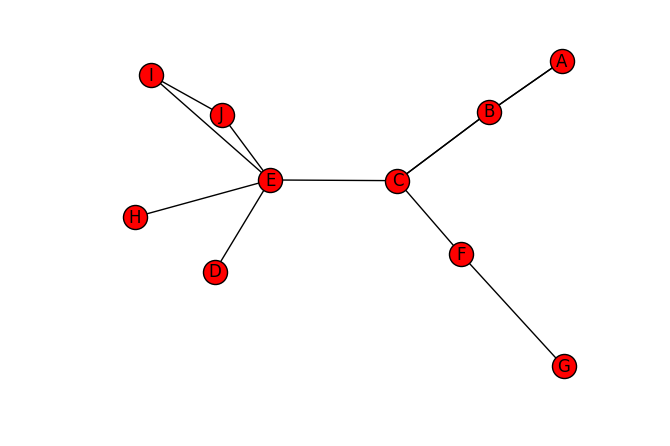

In [11]:
nx.draw(G2,with_labels=True) ## mulrigraph

In [12]:
G2.edge['A']['B'] # one dictionary of attributes per (A,B) edge

{0: {'relation': 'family', 'weight': 16},
 1: {'relation': 'friend', 'weight': 14}}

In [13]:
G2.edges(data=True)

[('A', 'B', {'relation': 'family', 'weight': 16}),
 ('A', 'B', {'relation': 'friend', 'weight': 14}),
 ('C', 'B', {'relation': 'friend', 'weight': 13}),
 ('C', 'B', {'relation': 'friend', 'weight': 10}),
 ('C', 'E', {'relation': 'neighbor', 'weight': 25}),
 ('C', 'F', {'relation': 'labmate', 'weight': 27}),
 ('E', 'I', {'relation': 'labmate', 'weight': 6}),
 ('E', 'H', {'relation': 'labmate', 'weight': 9}),
 ('E', 'J', {'relation': 'family', 'weight': 15}),
 ('E', 'D', {'relation': 'labmate', 'weight': 13}),
 ('G', 'F', {'relation': 'friend', 'weight': 7}),
 ('I', 'J', {'relation': 'labmate', 'weight': 3})]

## Read graph

In [14]:
Gd = nx.read_gml('../data/dolphins.gml')

In [15]:
nodes = Gd.nodes()
edges = Gd.edges()

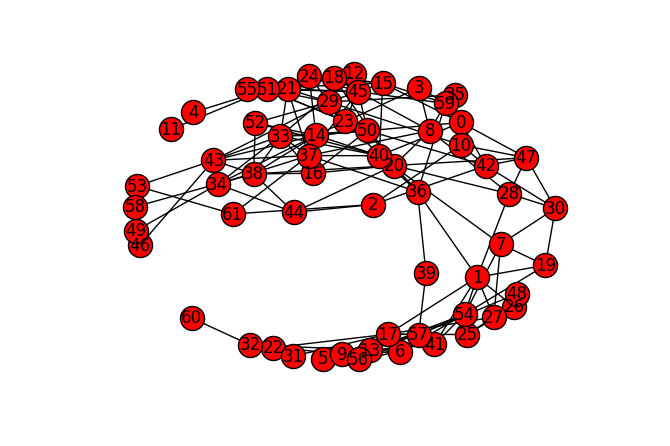

In [16]:
nx.draw(Gd, with_labels=True)

## Compute centrality based node attibutes

## Degree Centrality

### Degree

$d_{v}$ = number of connected edges 

In [17]:
degree = Gd.degree()
nx.set_node_attributes(Gd,'degree',degree)

In [18]:
degree[7]

5

In [19]:
degree_sorted =sorted(nx.degree(Gd).values(),reverse=True)
dmax=max(degree_sorted)

In [20]:
dmax

12

In [21]:
print degree.keys()[degree.values().index(12)]

14


### Degree Centrality

$C_{dv}$ = $\frac{d_{v}}{|N|-1}$

In [22]:
#degree

In [23]:
degreeCen = nx.degree_centrality(Gd)
nx.set_node_attributes(Gd,'degree_c',degreeCen)

In [24]:
degreeCen[7]

0.0819672131147541

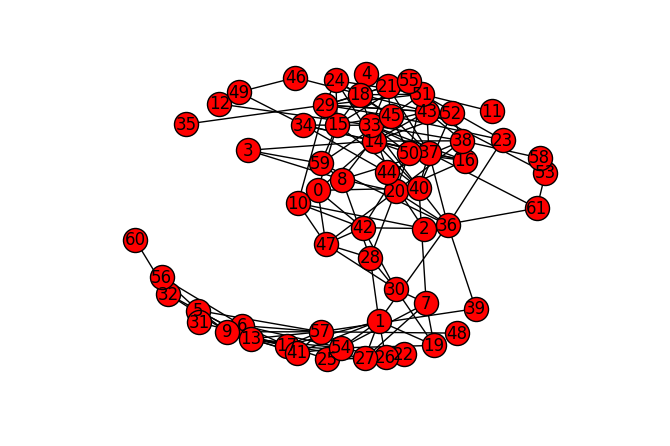

In [25]:
nx.draw(Gd,with_labels=True)

In [26]:
#### Indegree and Outdegree

## Closeness Centrality

### Path = # of steps connecting 2 nodes
### Distance = length of shoretest path between 2 nodes

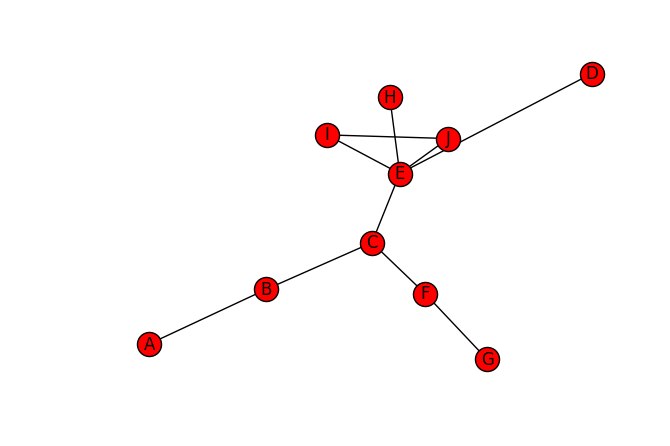

In [27]:
nx.draw(G,with_labels=True)

In [28]:
nx.shortest_path(G,'G','C')

['G', 'F', 'C']

In [29]:
nx.shortest_path_length(G,'G','C')

2

## Closeness Centrality

$C_{closev}$ = $\frac{|N|-1}{d_{v}}$ $$e^x=\sum_{i=0}^\infty \frac{1}{i!}x^i$$

In [30]:
close_cen = nx.closeness_centrality(Gd)
nx.set_node_attributes(Gd,'close_c',close_cen)

## Betweenness Centrality

In [31]:
bc = nx.betweenness_centrality(Gd)
nx.set_node_attributes(Gd,'betweenness_centrality',bc)

In [32]:
bc[36]

0.24823719602893804

In [33]:
bc_sorted =sorted(nx.betweenness_centrality(Gd).values(),reverse=True)
dmax=max(bc_sorted)

In [34]:
dmax

0.24823719602893804

In [35]:
print bc.keys()[bc.values().index(dmax)]

36


In [36]:
#cc = nx.clustering(G)
degree = Gd.degree()
bc = nx.betweenness_centrality(Gd)
#nx.set_node_attributes(G,'clustering_coefficient',cc)
nx.set_node_attributes(Gd,'degree',degree)
nx.set_node_attributes(Gd,'betweenness_centrality',bc)

In [37]:
node_to_color = visJS2jupyter.visJS_module.return_node_to_color(Gd,field_to_map='betweenness_centrality',cmap=mpl.cm.spring_r,alpha = 1,
                                                 color_max_frac = .9,color_min_frac = .1)

# set node initial positions using networkx's spring_layout function
pos = nx.spring_layout(Gd)

node_labels = nx.get_node_attributes(Gd,'label')

nodes_dict = [{"id":n,"color":node_to_color[n],
               "degree":nx.degree(Gd,n),
               "node_label":node_labels[n],
              "x":pos[n][0]*1000,
              "y":pos[n][1]*1000} for n in nodes
              ]
node_map = dict(zip(nodes,range(len(nodes))))  # map to indices for source/target in edges
edges_dict = [{"source":node_map[edges[i][0]], "target":node_map[edges[i][1]], 
              "color":"gray","title":'test'} for i in range(len(edges))]

# set some network-wide styles
visJS2jupyter.visJS_module.visjs_network(nodes_dict,edges_dict,
                          node_size_multiplier=7,
                          node_size_transform = '',
                          node_color_highlight_border='red',
                          node_color_highlight_background='#D3918B',
                          node_color_hover_border='blue',
                          node_color_hover_background='#8BADD3',
                          node_font_size=25,
                          node_label_field='node_label',               
                          edge_arrow_to=False,
                          physics_enabled=True,
                          edge_color_highlight='#8A324E',
                          edge_color_hover='#8BADD3',
                          edge_width=3,
                          max_velocity=15,
                          min_velocity=1,
                          graph_id="0")

## Karate Club

In [38]:
G1 = nx.read_gml('../data/karate.gml')

In [39]:
cc = nx.clustering(G1)
degree = G1.degree()
bc = nx.betweenness_centrality(G1)
nx.set_node_attributes(G1,'clustering_coefficient',cc)
nx.set_node_attributes(G1,'degree',degree)
nx.set_node_attributes(G1,'betweenness_centrality',bc)

In [40]:
nodes = G1.nodes()
edges = G1.edges()

In [41]:
import community.community_louvain as community

In [42]:
import matplotlib.pyplot as plt

In [43]:
parts = community.best_partition(G1)

In [44]:
values = [parts.get(node) for node in G1.nodes()]

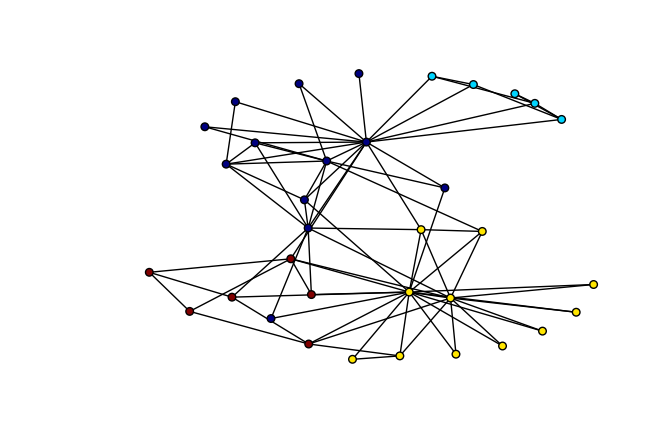

In [45]:
nx.draw_spring(G1, cmap = plt.get_cmap('jet'), node_color = values, node_size=30, with_labels=False)

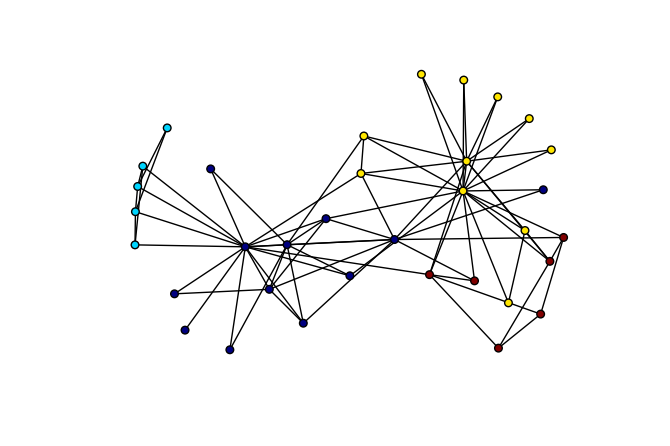

In [46]:
part = community.best_partition(G1)
values = [part.get(node) for node in G1.nodes()]

nx.draw_spring(G1, cmap = plt.get_cmap('jet'), node_color = values, node_size=30, with_labels=False)

In [47]:
node_to_color = visJS2jupyter.visJS_module.return_node_to_color(G1,field_to_map='betweenness_centrality',cmap=mpl.cm.spring_r,alpha = 1,
                                                 color_max_frac = .9,color_min_frac = .1)

# set node initial positions using networkx's spring_layout function
pos = nx.spring_layout(G1)

nodes_dict = [{"id":n,"color":node_to_color[n],
               "degree":nx.degree(G1,n),
              "x":pos[n][0]*1000,
              "y":pos[n][1]*1000} for n in nodes
              ]
node_map = dict(zip(nodes,range(len(nodes))))  # map to indices for source/target in edges
edges_dict = [{"source":node_map[edges[i][0]], "target":node_map[edges[i][1]], 
              "color":"gray","title":'test'} for i in range(len(edges))]

# set some network-wide styles
visJS2jupyter.visJS_module.visjs_network(nodes_dict,edges_dict,
                          node_size_multiplier=7,
                          node_size_transform = '',
                          node_color_highlight_border='red',
                          node_color_highlight_background='#D3918B',
                          node_color_hover_border='blue',
                          node_color_hover_background='#8BADD3',
                          node_font_size=25,
                          edge_arrow_to=True,
                          physics_enabled=True,
                          edge_color_highlight='#8A324E',
                          edge_color_hover='#8BADD3',
                          edge_width=3,
                          max_velocity=15,
                          min_velocity=1,
                          graph_id="1")

In [36]:
type(node_labels)

dict

In [37]:
node_labels

{0: u'Beak',
 1: u'Beescratch',
 2: u'Bumper',
 3: u'CCL',
 4: u'Cross',
 5: u'DN16',
 6: u'DN21',
 7: u'DN63',
 8: u'Double',
 9: u'Feather',
 10: u'Fish',
 11: u'Five',
 12: u'Fork',
 13: u'Gallatin',
 14: u'Grin',
 15: u'Haecksel',
 16: u'Hook',
 17: u'Jet',
 18: u'Jonah',
 19: u'Knit',
 20: u'Kringel',
 21: u'MN105',
 22: u'MN23',
 23: u'MN60',
 24: u'MN83',
 25: u'Mus',
 26: u'Notch',
 27: u'Number1',
 28: u'Oscar',
 29: u'Patchback',
 30: u'PL',
 31: u'Quasi',
 32: u'Ripplefluke',
 33: u'Scabs',
 34: u'Shmuddel',
 35: u'SMN5',
 36: u'SN100',
 37: u'SN4',
 38: u'SN63',
 39: u'SN89',
 40: u'SN9',
 41: u'SN90',
 42: u'SN96',
 43: u'Stripes',
 44: u'Thumper',
 45: u'Topless',
 46: u'TR120',
 47: u'TR77',
 48: u'TR82',
 49: u'TR88',
 50: u'TR99',
 51: u'Trigger',
 52: u'TSN103',
 53: u'TSN83',
 54: u'Upbang',
 55: u'Vau',
 56: u'Wave',
 57: u'Web',
 58: u'Whitetip',
 59: u'Zap',
 60: u'Zig',
 61: u'Zipfel'}

In [51]:
from igraph import *

In [53]:
g = Graph()

In [56]:
t = Graph.Read_GML("../data/dolphins.gml")

In [57]:
summary(t)

IGRAPH U--- 62 159 -- 
+ attr: id (v), label (v)


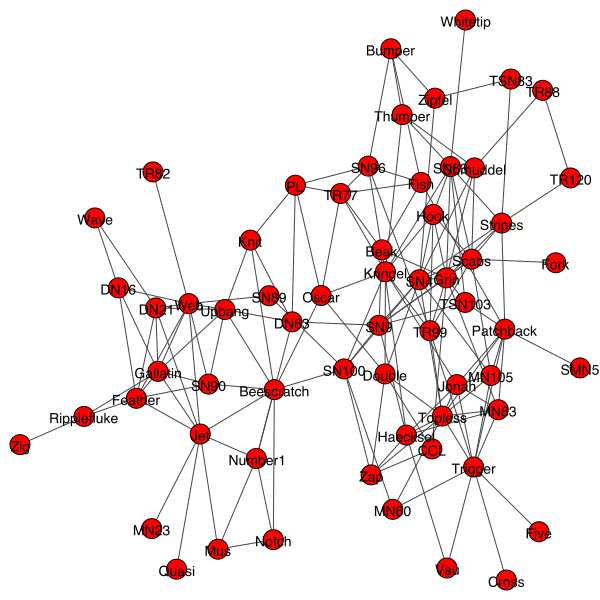

In [58]:
plot(t)

In [ ]:
ceb <- cluster_edge_betweenness(net) 

In [61]:
com = t.community_fastgreedy()

In [66]:
#plot(com,t)
#igraph.plot(t)

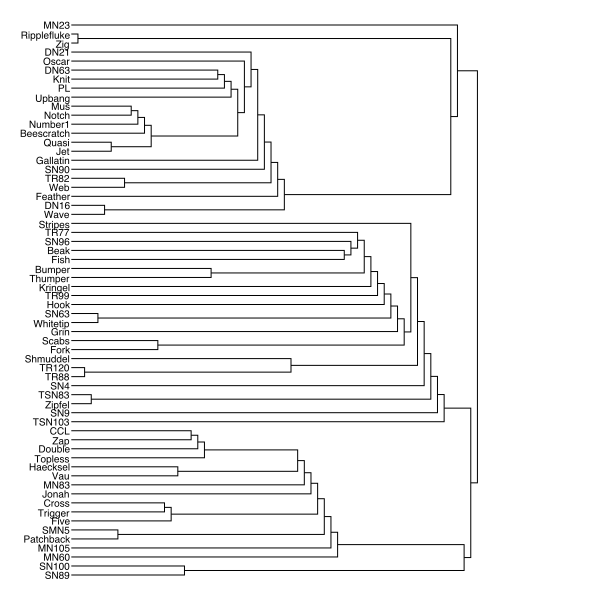

In [70]:
plot(com)

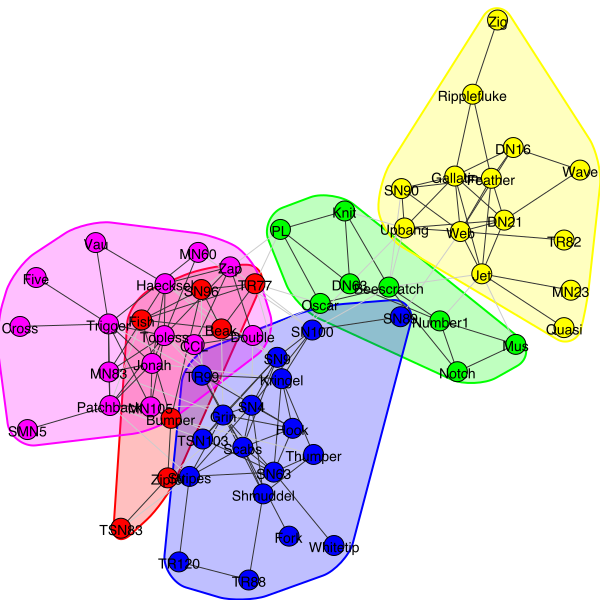

In [71]:
comms = t.community_multilevel()

plot(comms, mark_groups = True)

In [76]:
mod = t.modularity()

TypeError: modularity() takes at least 2 arguments (1 given)

In [79]:
t.community_optimal_modularity()

In [80]:
clust = t.community_optimal_modularity()

In [81]:
mod = t.modularity(clust)

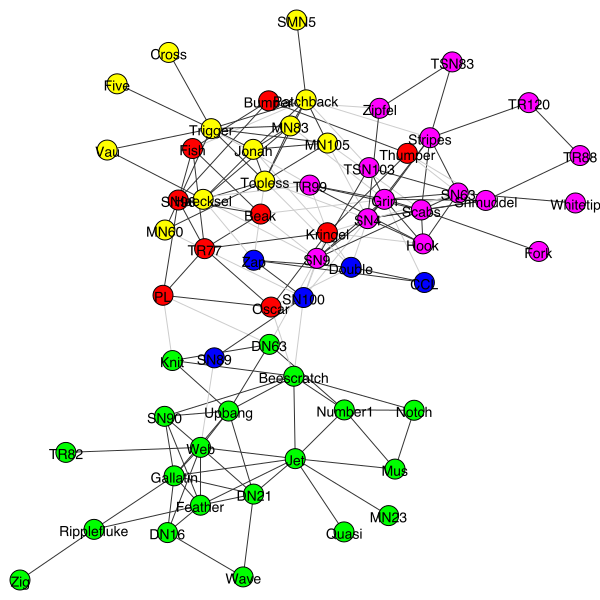

In [83]:
plot(clust)

In [85]:
summary(t)

IGRAPH U--- 62 159 -- 
+ attr: id (v), label (v)


In [86]:
ce = t.community_edge_betweenness()

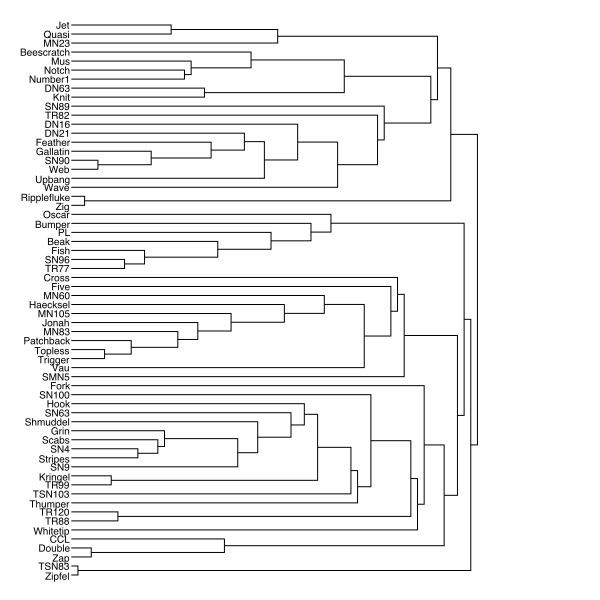

In [90]:
plot(ce)

In [92]:
cs = t.community_spinglass()

In [96]:
tm = t.get_adjacency(type=GET_ADJACENCY_BOTH)

In [105]:
tml = t.get_adjacency(type=GET_ADJACENCY_LOWER)

In [106]:
tml

Matrix([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

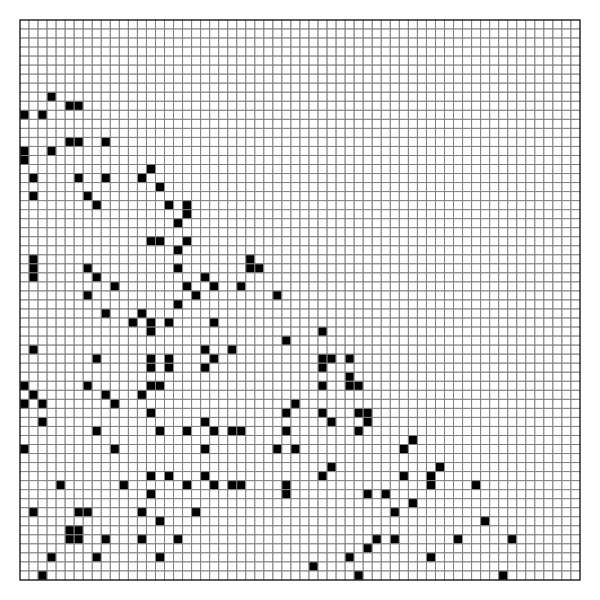

In [107]:
plot(tml)

In [99]:
type(tm)

igraph.datatypes.Matrix

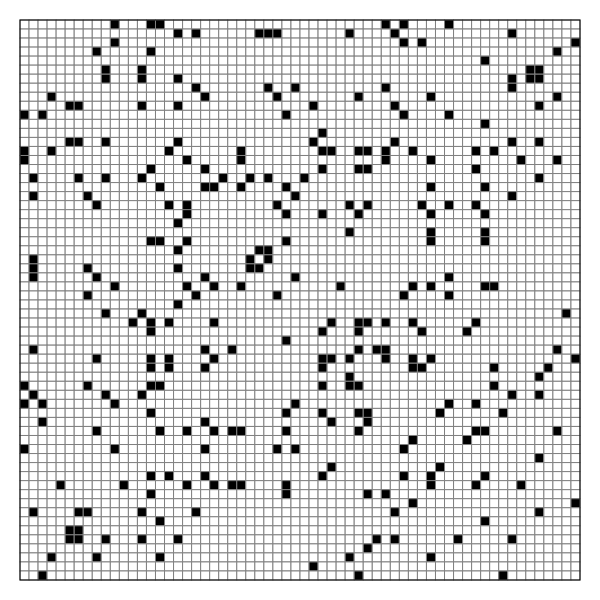

In [100]:
plot(tm)

In [104]:
?t.get_adjacency()

## Political Blogs

In [2]:
G2 = nx.read_gml('../data/polblogs.gml')

In [3]:
nodes = G2.nodes()
edges = G2.edges()

In [4]:
degree = G2.degree()
bc = nx.betweenness_centrality(G2)
nx.set_node_attributes(G2,'degree',degree)
nx.set_node_attributes(G2,'betweenness_centrality',bc)

In [5]:
node_to_color = visJS2jupyter.visJS_module.return_node_to_color(G2,field_to_map='value',cmap=mpl.cm.spring_r,alpha = 1,
                                                 color_max_frac = .9,color_min_frac = .1)

# set node initial positions using networkx's spring_layout function
pos = nx.spring_layout(G2)

nodes_dict = [{"id":n,
               "color":node_to_color[n],
               #"degree":nx.degree(G2,n),
              "x":pos[n][0]*1000,
              "y":pos[n][1]*1000} for n in nodes
              ]
node_map = dict(zip(nodes,range(len(nodes))))  # map to indices for source/target in edges
edges_dict = [{"source":node_map[edges[i][0]], "target":node_map[edges[i][1]], 
              "color":"gray","title":'test'} for i in range(len(edges))]

# set some network-wide styles
visJS2jupyter.visJS_module.visjs_network(nodes_dict,edges_dict,
                          #node_size_multiplier=1,
                          node_size_transform = '',
                          node_color_highlight_border='red',
                          node_color_highlight_background='#D3918B',
                          node_color_hover_border='blue',
                          node_color_hover_background='#8BADD3',
                          node_font_size=25,
                          edge_arrow_to=False,
                          physics_enabled=True,
                          edge_color_highlight='#8A324E',
                          edge_color_hover='#8BADD3',
                          edge_width=3,
                          max_velocity=15,
                          min_velocity=1,
                          graph_id="2")

In [75]:
modularity(t)

NameError: name 'modularity' is not defined

In [74]:
?modularity()

Object `modularity` not found.


In [54]:
test = Graph.Read_GraphML('../data/dolphins.gml')

InternalError: Error at foreign-graphml.c:1202: Document is empty
, Parse error